In [196]:
import torch
import numpy as np
import cv2
from torch.distributions import Normal, Uniform
from torch.distributions.kl import kl_divergence
from torch.nn import functional as F

from spair import debug_tools
from spair.modules import stn




In [1]:

B = 20
H = 10
W = 11
Context = 30

t = torch.arange(B * H * W * Context)
t2 = t.reshape(B, H, W, Context)

t3 = t2[:, 2:5, 2:5, ...]
t4 = t3.contiguous().view(B, 9, Context)
t4.shape


torch.Size([20, 9, 30])

In [14]:

range = 5

cols = np.arange(-range, range) 
rows = np.arange(-range, 1) # previous visited rows, including current row
mesh = np.meshgrid(cols, rows)
rotated = np.array(mesh).T
flattened = np.reshape(rotated, (-1, 2))  # flattens 
coords = flattened[:-range, :] # A list of coords 


In [98]:


# Testing if sliding index could 
x = torch.tensor(np.ones((3,3)) * 3., requires_grad=True)

x2 = torch.tensor(np.ones((2,2)) * 2, requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
y = torch.tensor(np.ones((5,5)) * 5, requires_grad=False)
y[:3,:3] = x 
y[3:,3:] += x2
y[4,2] = x3

v = torch.ones(5, 5, dtype=torch.double) * 0.001


# Testing frozen gradients
g = 0.6

y = g * y.detach() + (1-g) * y

out = y * 100
out.backward(v)

print('x grad', x.grad)
print('x2 grad', x2.grad)
print('x3 grad', x3.grad)
print(v)



x grad tensor([[0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400]], dtype=torch.float64)
x2 grad tensor([[0.0400, 0.0400],
        [0.0400, 0.0400]], dtype=torch.float64)
x3 grad tensor(0.0400)
tensor([[0.0010, 0.0010, 0.0010, 0.0010, 0.0010],
        [0.0010, 0.0010, 0.0010, 0.0010, 0.0010],
        [0.0010, 0.0010, 0.0010, 0.0010, 0.0010],
        [0.0010, 0.0010, 0.0010, 0.0010, 0.0010],
        [0.0010, 0.0010, 0.0010, 0.0010, 0.0010]], dtype=torch.float64)


Testing Distribution stuff



In [179]:
means = torch.randn(5,5)
sigmas  = torch.randn(5,5) 
q = Normal(loc=means, scale=sigmas)
#q = q.rsample()[None,...]

p = Normal(loc=5, scale=1)
#p = p.rsample()[None,...]

z = kl_divergence(q, p)
print(z)
print(p)
print(q)
#print(q.log())


tensor([[16.8388,  8.8837, 21.1495,  8.7082, 12.4242],
        [14.4011,  7.4555, 21.8633,  9.5328, 13.6611],
        [13.8057, 26.1755,  8.2373, 10.1558,  7.3999],
        [14.4117, 11.7476, 14.8190,  7.4312,  5.0163],
        [22.2008, 14.0156,  5.7998, 15.3988,  6.7364]])
Normal(loc: 5.0, scale: 1.0)
Normal(loc: torch.Size([5, 5]), scale: torch.Size([5, 5]))


Testing SNT


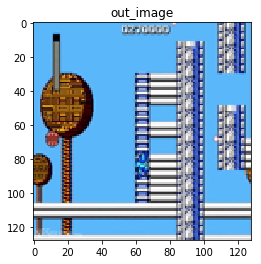

In [194]:
img_BGR = cv2.imread('spair/data/testimg.png')
img = img_BGR[..., ::-1].astype(np.float) # BGR to RGB
img /= 255. # color space [0, 1]
img = torch.from_numpy(np.array([np.moveaxis(img, [0,1,2], [1,2,0])], dtype=np.float32))

debug_tools.plot_stn_input_and_out(img)



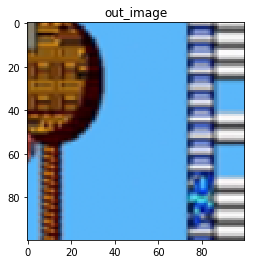

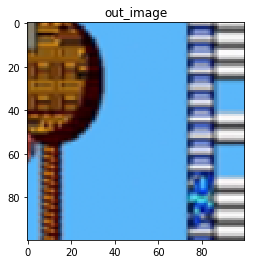

In [210]:
z_where = torch.tensor([0.2, 0.2, 0.5, 0.5])
out_dim = [100, 100]

out_img = stn(img, z_where, out_dim )
debug_tools.plot_stn_input_and_out(out_img)



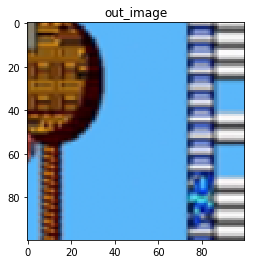

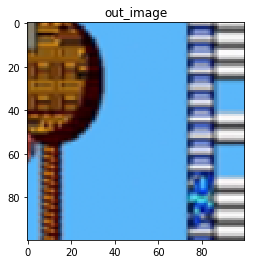

In [204]:
z_where = torch.tensor([0.2, 0.2, 0.5, 0.5])
out_dim = [100, 100]

out_img = stn(img, z_where, out_dim )
debug_tools.plot_stn_input_and_out(out_img)

